# COMP6200: DATA SCIENCE

PORTFOLIO PART 4

Name: Mai Trong Nghia Hoang

Student ID: 48728705

1. Data Source: https://www.kaggle.com/datasets/itshappy/ps4e9-original-data-loan-approval-prediction provided by Infinity from Kaggle.

2. License: Apache 2.0 Copyright [2024] [Infinity]

* Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License.
* You may obtain a copy of the License at: http://www.apache.org/licenses/LICENSE-2.0
* Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

**Task background**

The goal of this task is to develop a predictive model that determines whether a loan application will be approved and to assess the probability of default for approved loans. The financial sector is highly dependent on making accurate predictions regarding loan approvals and defaults, as poor lending decisions can lead to significant financial losses. Predicting loan approvals and defaults can help financial institutions manage risks more effectively and make more informed decisions.

This task will involve data preprocessing, exploratory analysis, and model development to accurately predict loan approval and the likelihood of default based on features such as income, employment length, home ownership status, loan amount, and credit history.

**Overview of the Dataset**

The dataset comprises loan application data, with each row representing an individual loan applicant. The primary goal is twofold: first, to predict whether a loan will be approved (loan_status: 1 = approved, 0 = denied), and second, for approved loans, to predict the likelihood of default based on applicant characteristics.

**Dataset Features**
1. person_age: The age of the loan applicant (numeric).
2. person_income: The annual income of the loan applicant (numeric).
3. person_home_ownership: The home ownership status of the applicant ("RENT", "OWN", "MORTGAGE").
4. person_emp_length: The length of employment in years (numeric).
5. loan_intent: The purpose of the loan (e.g., "PERSONAL", "EDUCATION", "MEDICAL", etc.).
6. loan_grade: The grade assigned to the loan (e.g., A, B, C, etc.), representing creditworthiness.
7. loan_amnt: The amount of the loan requested (numeric).
8. loan_int_rate: The interest rate assigned to the loan (numeric).
9. loan_status: The target variable indicating whether the loan was approved (1 = approved, 0 = denied).
10. loan_percent_income: The percentage of the applicant’s income that will go toward repaying the loan (numeric).
11. cb_person_default_on_file: A binary indicator of whether the applicant has a history of default (Y = Yes, N = No).
12. cb_person_cred_hist_length: The length of the applicant's credit history in years (numeric).

This dataset offers a rich set of variables that can be used to train machine learning models to predict loan approval and default risk, helping financial institutions make more accurate and data-driven lending decisions.

# 1. Define Problem and Objectives

**Problem Statement**

Can we predict whether a loan will be approved and the likelihood of default based on personal and financial information such as income, employment length, credit history, home ownership, and loan characteristics?

**Objective:** 

Primary Objective: Develop a predictive model that can accurately assess whether a loan will be approved based on factors such as an applicant's income, credit history, employment length, home ownership status, and loan characteristics (e.g., loan amount, loan grade, loan intent).

# 2. Data Preparation and Exploration

## A. Initial Exploration of the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Import the dataset "credit_risk_dataset.csv"
credit = pd.read_csv("credit_risk_dataset.csv")

In [2]:
# Display a few rows of the dataset

credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# Check shape of the data set (rows, columns) 

credit.shape

(32581, 12)

In [4]:
# Identify types, null counts, and names of variables in dataset

credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


* The dataset has 12 columns and 32581 rows.
* Categorical values include: person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file.
* Numerical values include: person_age, person_income, person_emp_length, loan_amnt, loan_int_rate, loan_status, loan_percent_income, cb_person_cred_hist_length

In [5]:
# Count null (missing values) in each column

credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

There are missing values in:
* Employment length: 895 values
* Loan interest rate: 3116 values

In [6]:
# Statistical summary of the dataset

credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
# Check unique values of each feature in the data set

for i in credit.columns: # loop through data in each column and get unique values only
    unique_i = credit[i].unique()
    print(i)
    print(unique_i)
    print("---"*25)

person_age
[ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  40  50  45  37  39  44  43  41  46  38  47  42  48  49  58  65  51
  53  66  61  54  57  59  62  60  55  52  64  70  78  69  56  73  63  94
  80  84  76  67]
---------------------------------------------------------------------------
person_income
[  59000    9600   65500 ...  720000 1900000    4888]
---------------------------------------------------------------------------
person_home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
---------------------------------------------------------------------------
person_emp_length
[123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  nan  11.
  18.  12.  17.  14.  16.  13.  19.  15.  20.  22.  21.  24.  23.  26.
  25.  27.  28.  31.  41.  34.  29.  38.  30.]
---------------------------------------------------------------------------
loan_intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
---------------------

## B. Handling Outliers

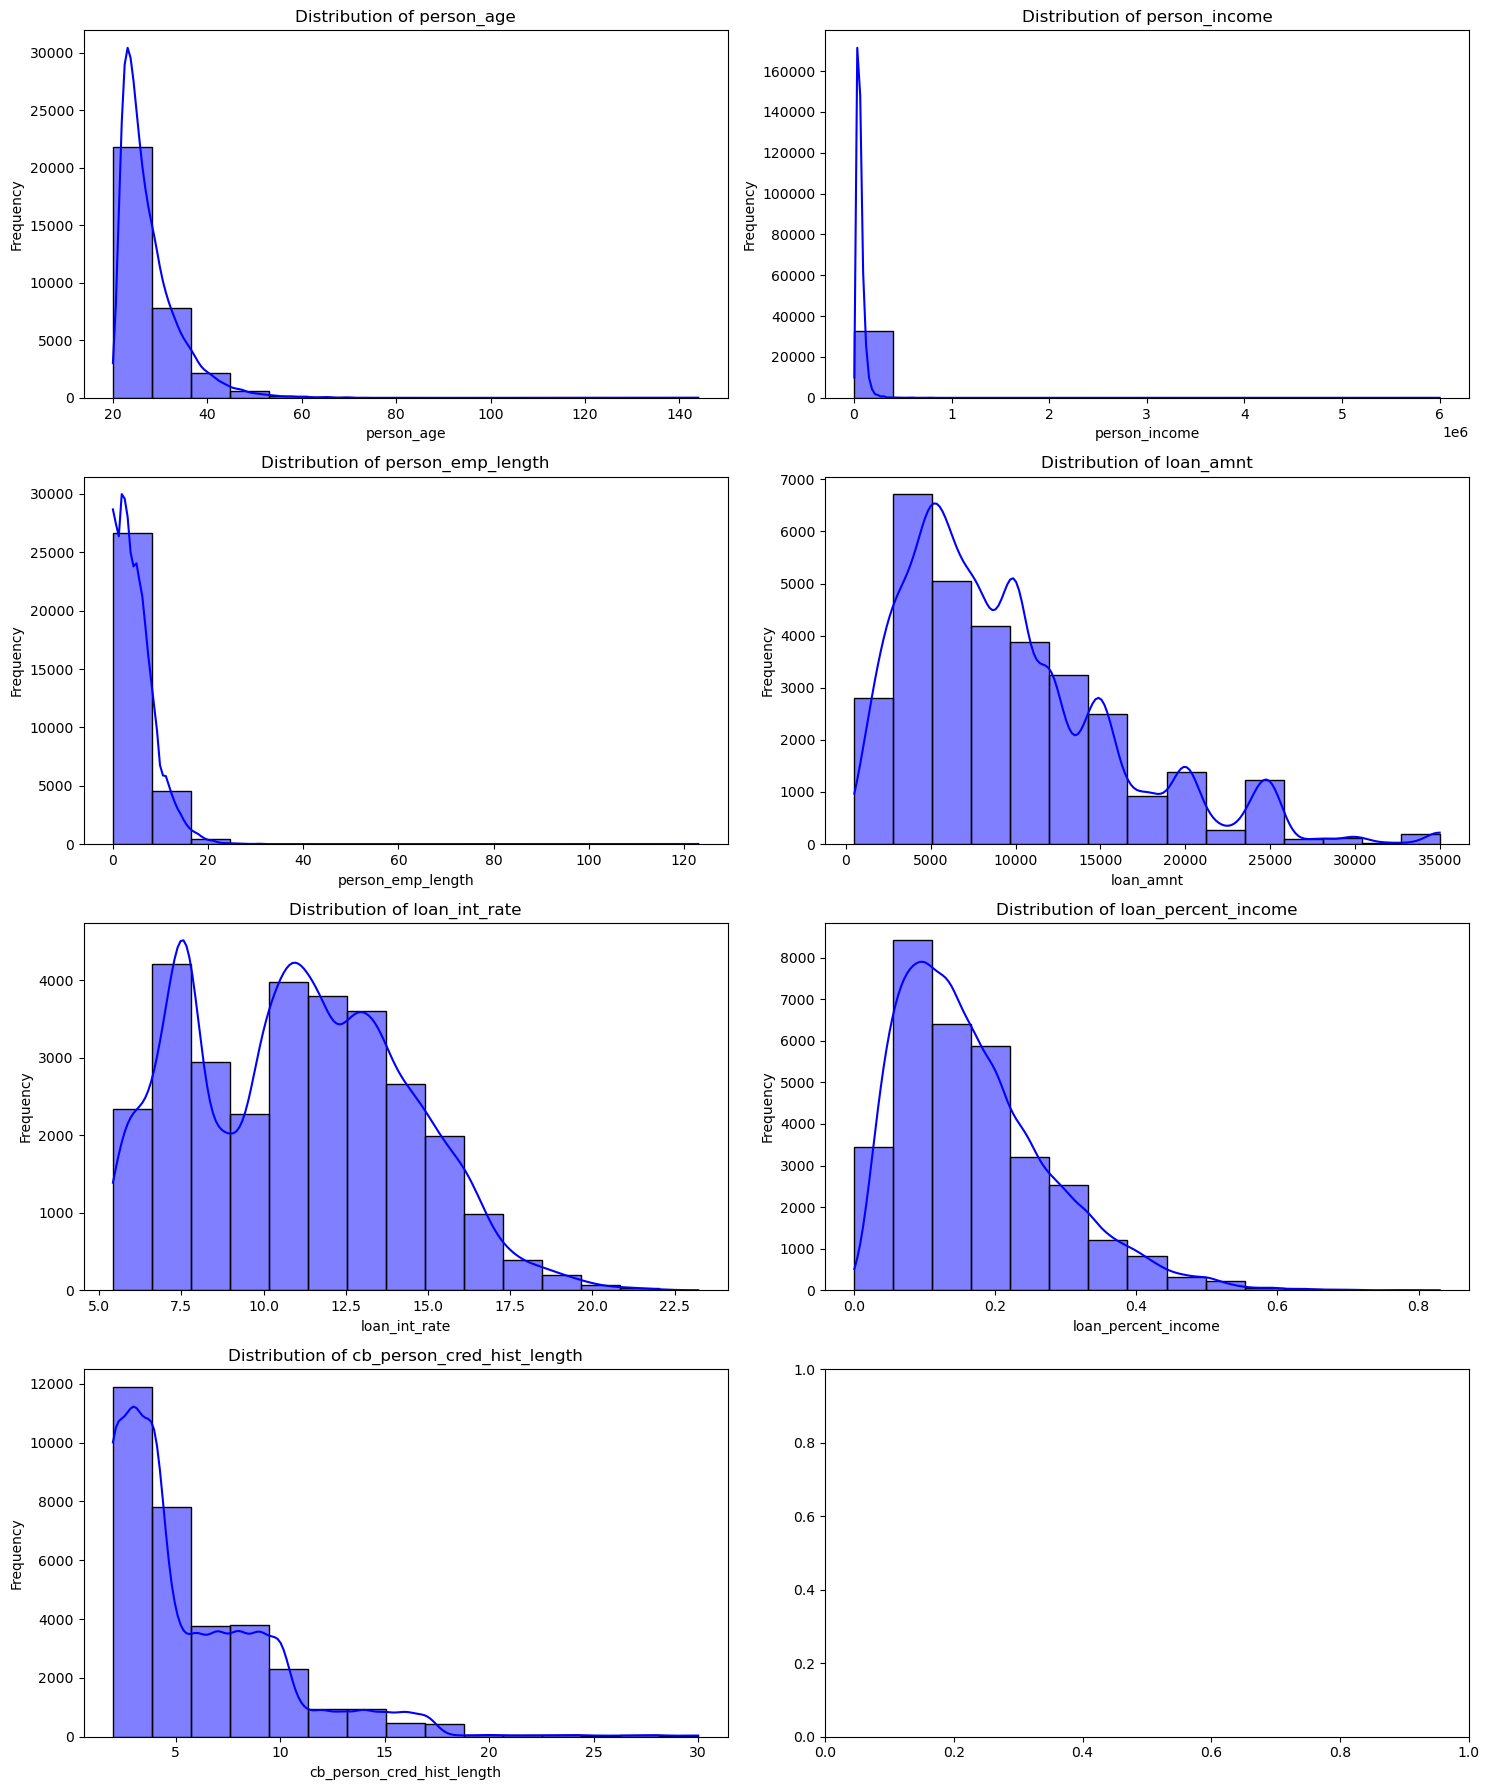

In [8]:
# List of features to plot the distribution (frequency of each data points in each feature)
features = [
    "person_age", "person_income", "person_emp_length", "loan_amnt", 
    "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]

# Flattening the axes array to easily iterate over it
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Looping through each feature and its respective subplot
for i, feature in enumerate(features):
    # Creating a histogram with a KDE line, with specified number of bins and color
    sns.histplot(credit[feature], ax=axes[i], kde=True, bins=15, color='blue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

**Justification for Removing Outliers**
1. Model Performance:
* Outliers distort the relationships between features and target variables, especially in models sensitive to extreme values (e.g., linear regression, KNN). These **extreme values** can lead to **biased predictions**, pulling the model toward **unrealistic conclusions**. Removing outliers ensures that the model focuses on the core data patterns that generalize well, rather than being skewed by rare anomalies.

2. Data Integrity (reasonable and meaningful input):
* Outliers like ages over 100 or unrealistic employment lengths (e.g., 123 or 144 years) reflect data entry errors or **rare, non-representative cases**. Including these data points can undermine the integrity of the analysis, leading to misleading conclusions. Removing them ensures the model is trained on data that is representative and meaningful, enhancing the quality and trustworthiness of the results.

3. Domain Knowledge & Industry Practices:
* In financial modeling, it's standard practice to remove or cap outliers because they **don't represent typical loan applicant behavior**. Outliers can skew risk assessment models, leading to incorrect decisions. By removing them, we align with industry practices that prioritise decision-making based on typical cases, ensuring that our model reflects real-world decision criteria used in loan approvals and risk evaluations.

In [9]:
# Looping through all columns in the credit DataFrame and calculate quartile figures

for col in features:
    Q1 = credit[col].quantile(0.25) # Calculating the 1st quartile (25th percentile) for the column
    Q3 = credit[col].quantile(0.75) # Calculating the 3rd quartile (75th percentile) for the column
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers, by assessing each column and only retain rows within (Q1 - 1.5*IQR) and (Q3 + 1.5*IQR)
    credit = credit[(credit[col] >= lower_bound) & (credit[col] <= upper_bound)]

**Reasons for removing outliers instead of applying other approaches (e.g., capping data points, transforming)**
* In this dataset, the reason that we do not cap or transform the outliers is that capping or transforming still retains extreme values, which can distort model training, especially for models sensitive to outliers. Removing outliers ensures the model is not skewed by these extremes, resulting in more reliable and generalizable predictions.
* In financial modeling, extreme values like very high incomes or loan amounts are often excluded to prevent skewed risk assessments. Lenders typically discard outliers to focus on the core of the applicant population. In this case, removing outliers ensures the model reflects **standard loan approval processes**, where **unusual cases are handled separately**, leading to more applicable and robust decisions.

## C. Handling Missing Values

In [10]:
# Count null (missing values) in each column

credit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

The outlier removing process has also handle missing values that have been presented in the original dataset. **The dataset is now free of missing values.**

## D. Handling Data Inconsistencies

In [11]:
# Display the first 2 rows of the dataset

credit.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


### 1. Consistency in Feature Units

Given the consistency of the other numeric features such as **person_income and loan_amount**, which are represented as **raw numbers rather than percentages**, loan interest rate should also be standardised to align with these conventions.

Solution: Convert loan_int_rate to decimal format: This involves dividing by 100 so that interest rates like 11.14% become 0.1114, making them consistent with other **numeric features like income and loan amount, which are represented as numbers rather than percentages**.

This will ensure that all values in loan_int_rate are in decimal format, consistent with other numeric fields.

In [12]:
credit['loan_int_rate'] = credit["loan_int_rate"] / 100

### 2. Loan Grade vs Loan Interest Rate

* Higher loan grades (e.g., A, B) typically receive lower interest rates, while lower grades (e.g., D, E, F, G) have higher rates due to higher risk.
* If any higher-grade loans (A, B) have unusually high interest rates or if lower-grade loans (D, E, etc.) have rates that are too low, which may indicate inconsistencies.

In [13]:
# Check for higher loan grades with unusually high interest rates, or lower grades with unusually low rates
rate_grade = credit[
    ((credit['loan_grade'] == 'A') & (credit['loan_int_rate'] > 0.15)) |
    ((credit['loan_grade'] == 'G') & (credit['loan_int_rate'] < 0.10))
]

print(f"Unusual interest rates against credit ratings: {rate_grade.shape[0]}")

Unusual interest rates against credit ratings: 0


### 3. Employment Length vs Age

* Employment length must be reasonable compared to a person's age. For instance, a person cannot have 20 years of employment if they are only 25 years old. 
* Check if employment length exceeds what would be reasonable given the person's age (assuming work typically starts at age 18).

In [14]:
# Check if employment length exceeds reasonable values compared to age.
# Assume age of 16 is the start of employment.
# In many countries, typically, 16 years old is considered the minimum legal age for employment, particularly for part-time or light work.

age_vs_employment = credit[credit["person_emp_length"] > (credit['person_age'] - 16)]

print(f"Unusual employment length against ages: {age_vs_employment.shape[0]}")

Unusual employment length against ages: 529


In [15]:
# Remove unusual employment length

credit = credit[credit["person_emp_length"] <= (credit["person_age"] - 16)]

In [16]:
# Re-check unusual employment length

age_vs_employment = credit[credit["person_emp_length"] > (credit['person_age'] - 16)] # Expected result: 0

print(f"Unusual employment length against ages: {age_vs_employment.shape[0]}")

Unusual employment length against ages: 0


### 4. Home Ownership vs Loan Percent of Income

Homeowners (e.g., OWN, MORTGAGE) tend to have more financial stability as they have properties which might be used as collaterals, so we expect them to have lower loan-to-income ratios than renters. We'll check for homeowners who have unusually high loan-to-income ratios, which might indicate a potential inconsistency or financial strain.

In [17]:
# Check for homeowners with high loan-to-income ratios (>50%)
ownership_vs_loan_percent = credit[
    (credit['person_home_ownership'].isin(['OWN', 'MORTGAGE'])) &
    (credit['loan_percent_income'] > 0.5)]

print(f"Unusual loan-to-income ratio against ownership of properties (collaterals): {ownership_vs_loan_percent.shape[0]}")

Unusual loan-to-income ratio against ownership of properties (collaterals): 0


## Re-check Dataset After EDA Process

In [18]:
# Re-check data shape

credit.shape

(22466, 12)

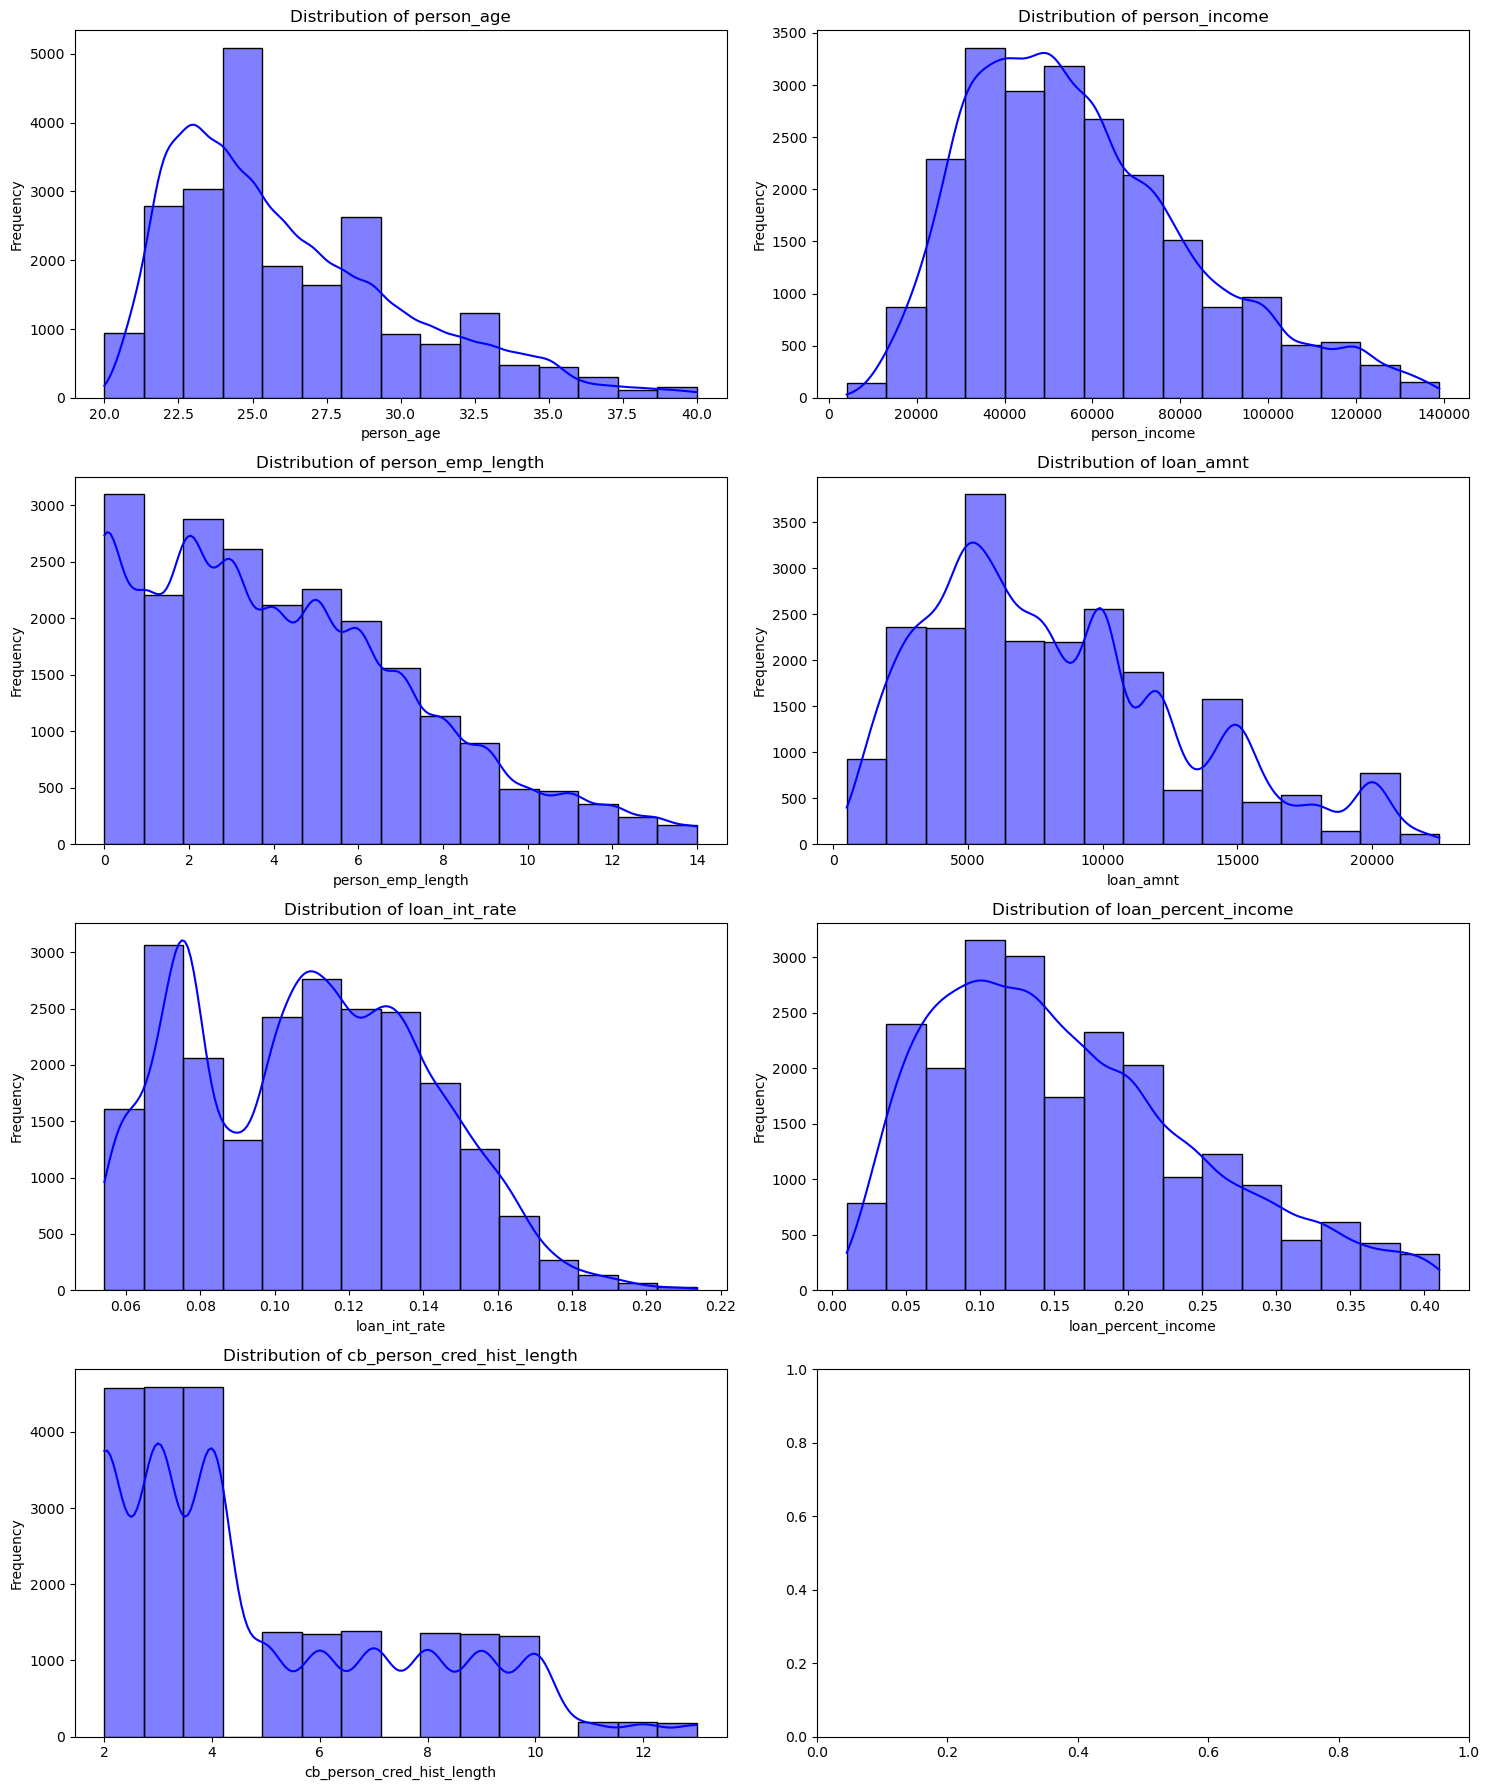

In [19]:
# List of features to plot the distribution for
features = [
    "person_age", "person_income", "person_emp_length", "loan_amnt", 
    "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]

# Flattening the axes array to easily iterate over it
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Looping through each feature and its respective subplot
for i, feature in enumerate(features):
    # Creating a histogram with a kernel density estimate (KDE) line, with specified number of bins and color
    sns.histplot(credit[feature], ax=axes[i], kde=True, bins=15, color='blue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

**Observations from the Distributions after Cleaning Process**
1. The age distribution is right-skewed, with a large concentration of applicants between ages 22 and 30. This suggests that most loan applicants are relatively young.
2. The income distribution is slightly right-skewed, with a median income between $40,000$ and $60,000$. Some applicants have incomes reaching above $100,000$, but most fall below this range.
3. Employment length is heavily right-skewed, with many people having less than 5 years of experience. This aligns with the younger age group we saw in the age distribution.
4. The distribution of loan amounts is fairly bimodal, with peaks around $5,000$ and $10,000$. This could indicate that there are two common ranges of loan requests, possibly for different loan types or intents.
5. The loan interest rate distribution is right-skewed, with most rates ranging between 6% and 14%, and a few loans going as high as 20%. Higher rates are often associated with higher loan risk (e.g., lower grades).
6. Some applicants have loans up to 40% of their income, which might indicate higher risk.
7. With a significant number of applicants having relatively short credit histories (between 2 and 6 years), this likely reflects the younger applicant pool.

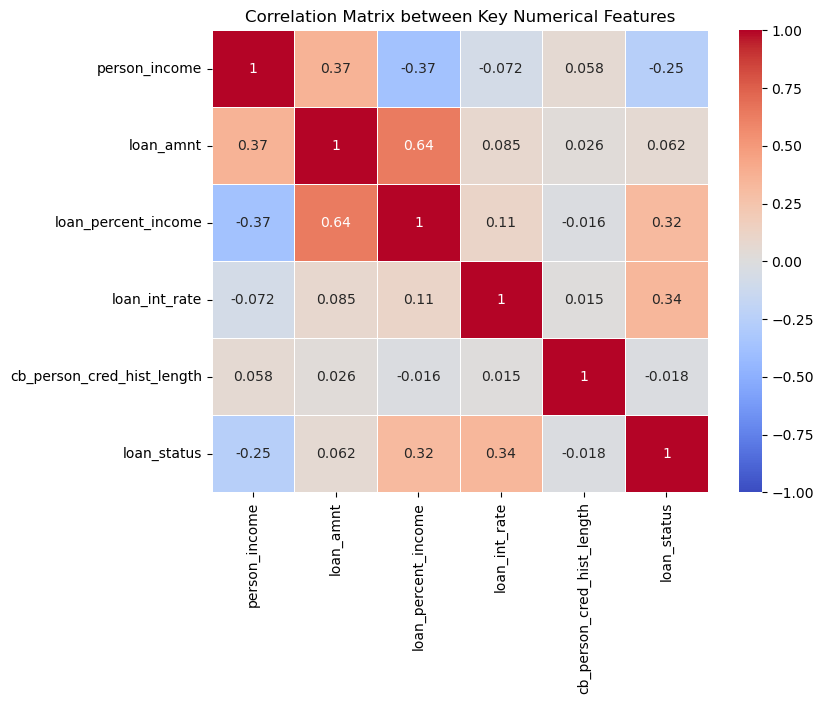

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation between key numerical features including loan status
key_numerical_features = ['person_income', 'loan_amnt', 'loan_percent_income', 'loan_int_rate', 'cb_person_cred_hist_length', 'loan_status']
correlation_matrix = credit[key_numerical_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix between Key Numerical Features')
plt.show()

The observed correlations, such as the **negative relationship between person income and loan percent income, are logical**. Higher-income individuals generally devote a smaller percentage of their income to loans. The positive correlation between loan percent income and loan amount also aligns with expectations: larger loans make up a higher portion of income.

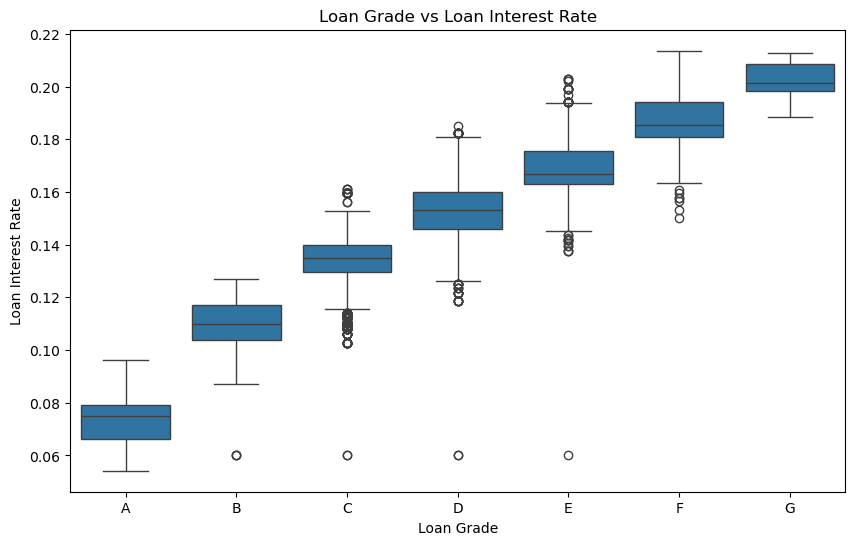

In [21]:
# Visualizing Loan Grade vs Loan Interest Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_grade', y='loan_int_rate', data=credit, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Loan Grade vs Loan Interest Rate')
plt.xlabel('Loan Grade')
plt.ylabel('Loan Interest Rate')
plt.show()

The relationship between loan grades and interest rates is very logical. Higher credit grades (A, B) are rewarded with lower interest rates, while lower grades (F, G) are charged higher rates due to increased credit risk. This matches standard risk-based lending practices.

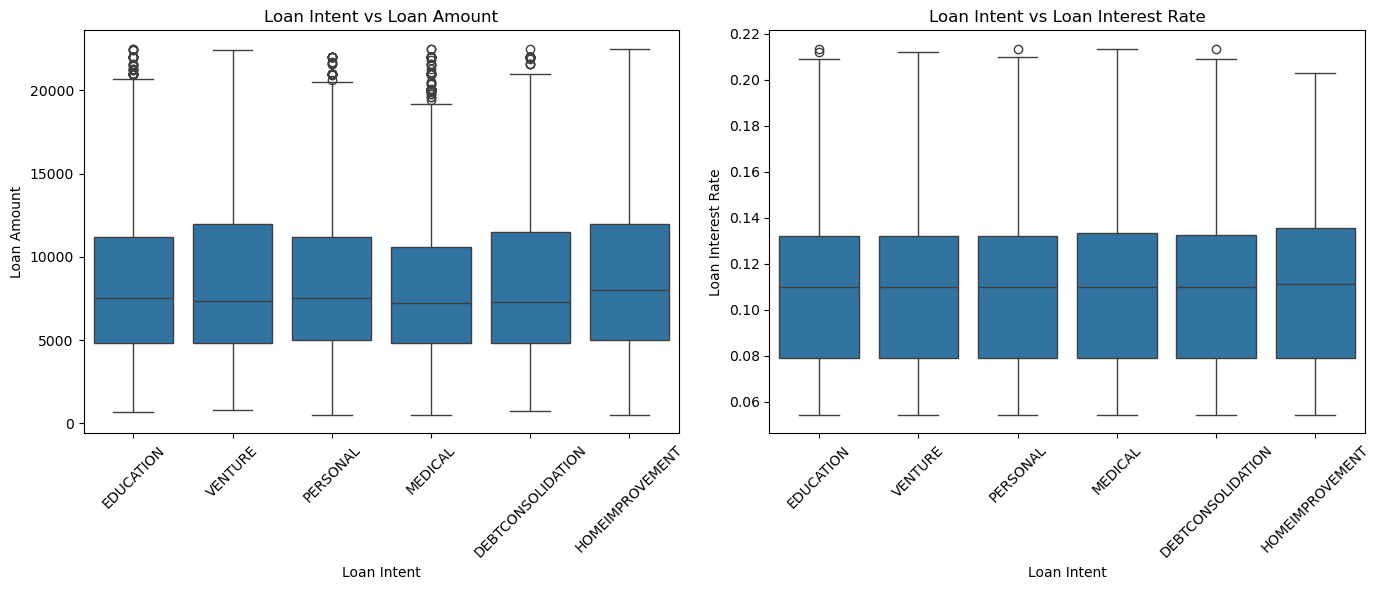

In [22]:
# Visualizing Loan Intent vs Loan Amount and Interest Rate
plt.figure(figsize=(14, 6))

# Loan Intent vs Loan Amount
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_intent', y='loan_amnt', data=credit)
plt.title('Loan Intent vs Loan Amount')
plt.xticks(rotation=45)
plt.xlabel('Loan Intent')
plt.ylabel('Loan Amount')

# Loan Intent vs Loan Interest Rate
plt.subplot(1, 2, 2)
sns.boxplot(x='loan_intent', y='loan_int_rate', data=credit)
plt.title('Loan Intent vs Loan Interest Rate')
plt.xticks(rotation=45)
plt.xlabel('Loan Intent')
plt.ylabel('Loan Interest Rate')

plt.tight_layout()
plt.show()

Loan amounts being relatively consistent across different loan intents makes sense, though slight variations, such as home improvement loans being higher, are also expected. Education loans having slightly lower interest rates is logical, as they may be subject to more favorable terms.

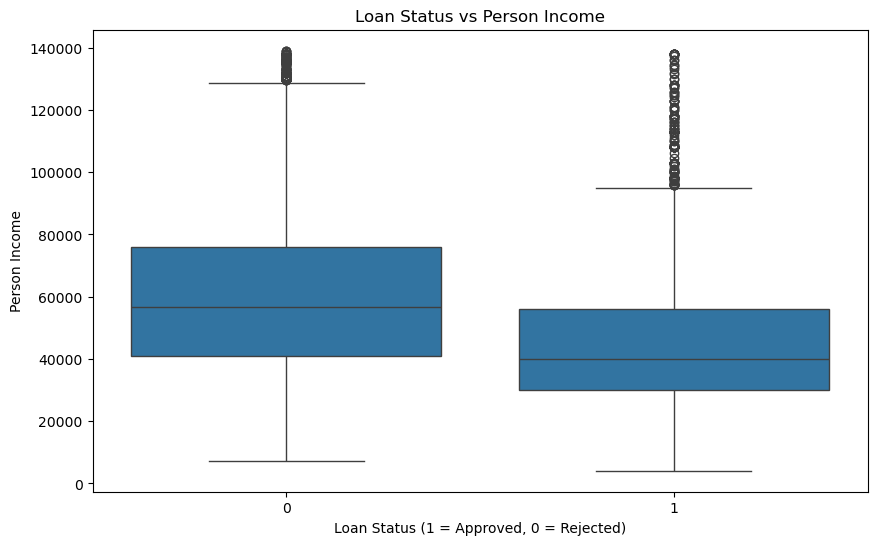

In [23]:
# Loan Status Analysis: Approved (1) vs Rejected (0)
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='person_income', data=credit)
plt.title('Loan Status vs Person Income')
plt.xlabel('Loan Status (1 = Approved, 0 = Rejected)')
plt.ylabel('Person Income')
plt.show()

* The fact that rejected loans tend to have slightly higher incomes is unexpected but can still be logical if the applicants do not own any properties or similar assets that can be used as securities against the event of default. 
* Higher-income applicants may request larger or riskier loans, or lenders may factor in other considerations beyond income, such as debt-to-income ratio or loan purpose.

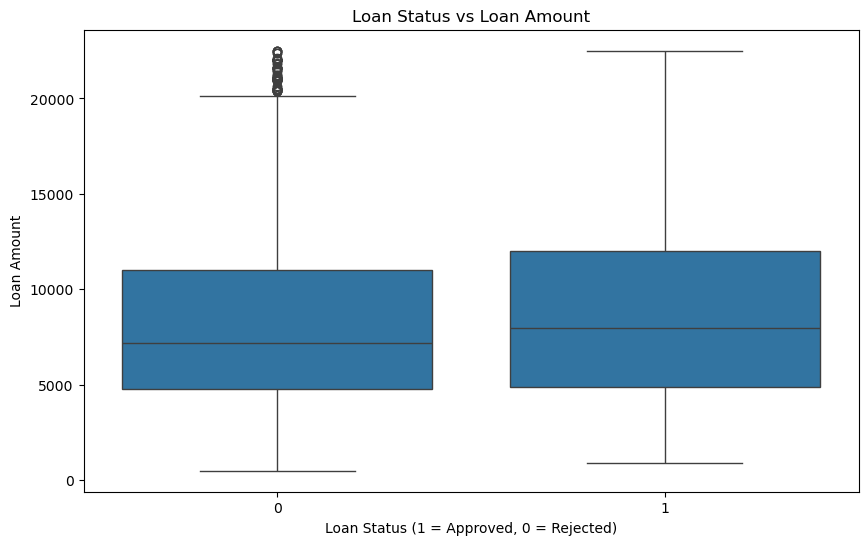

In [24]:
# Additional comparisons based on loan amount and grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=credit)
plt.title('Loan Status vs Loan Amount')
plt.xlabel('Loan Status (1 = Approved, 0 = Rejected)')
plt.ylabel('Loan Amount')
plt.show()

The similar loan amounts for approved and rejected loans suggest that loan amount is not a decisive factor for approval. This is reasonable if lenders rely more on loan grade and interest rates to assess risk.

In [25]:
# Cross-checking approval rates and defaults (loan_status = 0 or 1) for each loan grade
loan_grade_summary = credit.groupby('loan_grade').agg(
    total_loans=('loan_status', 'count'),  # Total loans per grade
).reset_index()

loan_grade_summary

,loan_grade,total_loans
0,A,7616
1,B,7088
2,C,4607
3,D,2397
4,E,619
5,F,115
6,G,24


* Loan Grade A: The highest credit quality, with 24 total loans, suggesting a focus on high-quality but lower-volume lending.
* Loan Grade B: A higher volume than Grade A, with 115 total loans, indicating a moderate risk tier with more applicants.
* Loan Grade C: There are 619 total loans, showing increased volume as the credit quality lowers slightly.
* Loan Grade D: A significant increase in loan volume, with 2397 loans, indicating that the financial institution is targeting this mid-risk category.
* Loan Grade E: With 4607 loans, this grade shows a strong presence in the institution’s portfolio, suggesting a focus on higher-risk loans.
* Loan Grade F: 7088 total loans—the portfolio is skewed toward this higher-risk tier.
* Loan Grade G: The largest number of loans, 7616, representing the institution's highest-risk category, suggesting a potential strategy of targeting high-risk, high-interest loans.

This distribution indicates that the financial institution is heavily focused on higher-risk loans (grades D, E, F, G) with higher potential returns, while maintaining a smaller number of high-quality loans (grades A, B). This could **imply a high-risk, high-reward lending strategy.**

In [26]:
credit.to_csv('final_data.csv', index=False)

# 3. Applications of Predictive Models

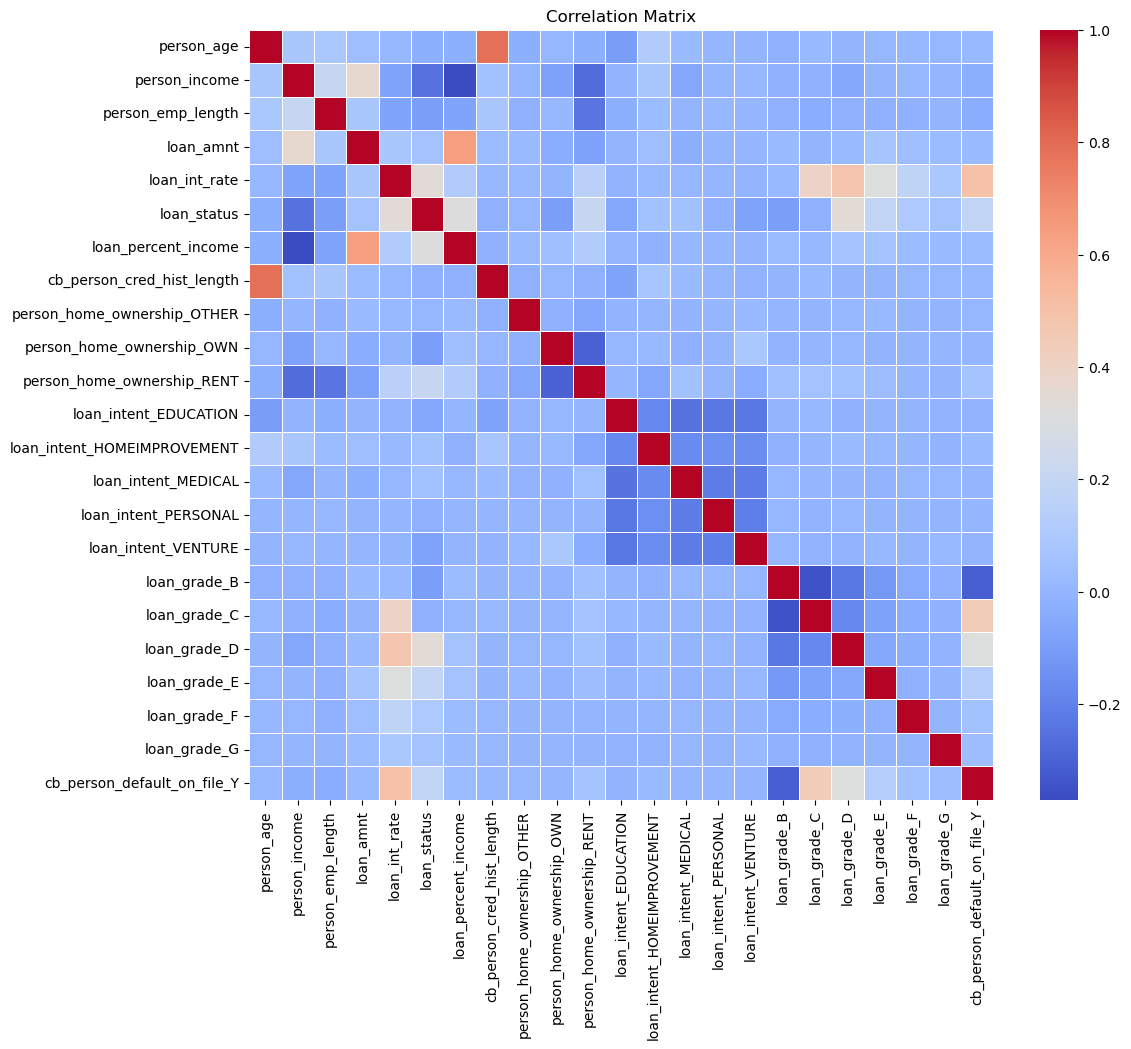

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply one-hot encoding to categorical columns
credit_final = pd.get_dummies(credit, 
                                    columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'],
                                    drop_first=True)

# Compute the correlation matrix
correlation = credit_final.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## 3.1 Logistic Regression Model

### 3.1.1 Set Up Training and Testing Sets

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# Select relevant features and target variable for logistic regression
X = credit_final.drop('loan_status', axis=1)
y = credit_final['loan_status']

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 48728705) # Use my Student ID as random state

### 3.1.2 Train Logistic Regression Model and Apply The Trained Model on Testing Data

In [29]:
# Since features in the dataset might have different measuring scales, making the comparisions and analyese not accurate
# Apply Standardisation to transform the dataset (each feature will now have a mean of 0 and standard deviation of 1)
scaler = StandardScaler()

# Fit the scaler on the training dataset only and apply the transformation to both the training and testing dataset.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the training dataset
# Since the target label (loan default/approval) is imbalanced (number of loans approved or declined)
model = LogisticRegression(max_iter = 1000, random_state = 48728705, class_weight='balanced') # Apply "balance" to weight imbalanced dataset
model.fit(X_train_scaled, y_train)

# Predict the target value on the testing data
y_train_pred = model.predict(X_train_scaled) # Apply the model on the training dataset
y_test_pred = model.predict(X_test_scaled) # Apply the model on the testing dataset

# Evaluate the model using the following metrics (accuracy, confusion matrix, and classification report)
# Metrics on Training Data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Metrics on Testing Data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Display the evaluating metrics
print("Evaluating Metrics on Training Dataset")
print(f"Accuracy: {train_accuracy}")
print(f"F1-Score: {train_f1}")
print("-"*50)
print("Evaluating Metrics on Testing Dataset")
print(f"Accuracy: {test_accuracy}")
print(f"F1-Score: {test_f1}")

Evaluating Metrics on Training Dataset
Accuracy: 0.804336767137225
F1-Score: 0.6134907674915212
--------------------------------------------------
Evaluating Metrics on Testing Dataset
Accuracy: 0.8037091988130564
F1-Score: 0.6134969325153374


### 3.1.3 Apply RFE to Determine The Optimal Number of Features

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score

# Initialise lists to store accuracy and F1 Scores
acc_scores = []
f1_scores = []

# Loop through feature elimination from 1 to the total number of features
for i in range(1, X_train_scaled.shape[1] + 1):
    clf = LogisticRegression(max_iter = 1000, class_weight='balanced') # Ensure logistic regression has enough iterations
    rfe = RFE(estimator = clf, n_features_to_select = i)
    
    # Fit the RFE Model
    rfe.fit(X_train_scaled, y_train)

    # Predict on the test set using the RFE-transformed data
    y_pred = rfe.predict(X_test_scaled)

    # Calculate accuracy and F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print("Accuracy on testing data using", i, "features: ", accuracy)
    print("F-1 Score on testing data using", i, "features: ", f1)
    print("-" * 20)

    # Append metrics to the list
    acc_scores.append(accuracy)
    f1_scores.append(f1)

Accuracy on testing data using 1 features:  0.658753709198813
F-1 Score on testing data using 1 features:  0.4422890397672163
--------------------
Accuracy on testing data using 2 features:  0.7259643916913947
F-1 Score on testing data using 2 features:  0.5226156629620057
--------------------
Accuracy on testing data using 3 features:  0.7513353115727003
F-1 Score on testing data using 3 features:  0.5487345180398492
--------------------
Accuracy on testing data using 4 features:  0.7645400593471811
F-1 Score on testing data using 4 features:  0.5672211617125715
--------------------
Accuracy on testing data using 5 features:  0.7908011869436202
F-1 Score on testing data using 5 features:  0.5924855491329479
--------------------
Accuracy on testing data using 6 features:  0.7988130563798219
F-1 Score on testing data using 6 features:  0.6007067137809188
--------------------
Accuracy on testing data using 7 features:  0.798219584569733
F-1 Score on testing data using 7 features:  0.6002

**Improvement with More Features**

As features are added, the accuracy steadily increases, peaking around 12-13 features, reaching values close to 80.5%. After this point, there is a plateau, suggesting that adding more features beyond this number does not provide a significant improvement in accuracy.
The F1 score follows a similar trend, starting from a low value of 0.44 with one feature and gradually improving as more features are included. The F1 score peaks at around 12 features with a value of approximately 0.614.

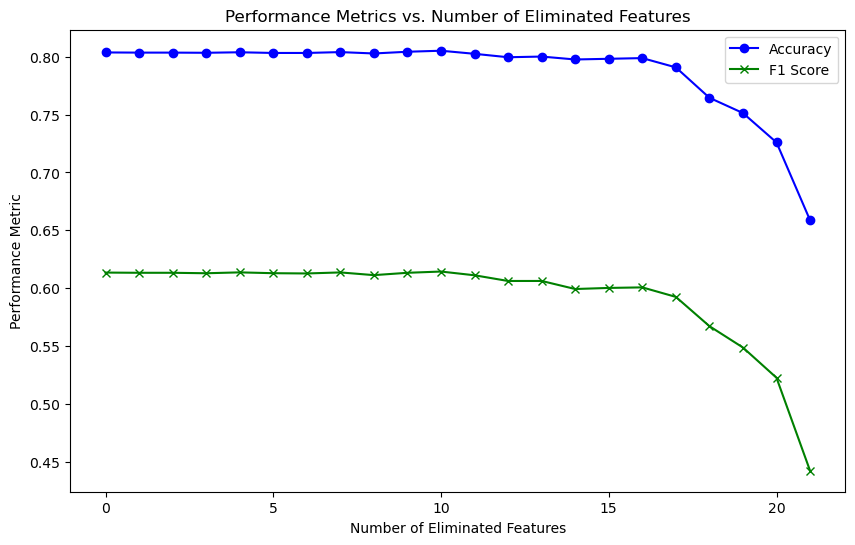

In [31]:
import matplotlib.pyplot as plt

# And num_features is the number of retained features (total features - eliminated)
num_features = list(range(1, len(acc_scores) + 1))
eliminated_features = [max(num_features) - x for x in num_features]  # converting to eliminated features

# Plot the change in performance metrics
plt.figure(figsize=(10, 6))
plt.plot(eliminated_features, acc_scores, label='Accuracy', marker = "o", linestyle='-', color='blue')
plt.plot(eliminated_features, f1_scores, label='F1 Score', marker = "x", linestyle='-', color='green')

plt.xlabel('Number of Eliminated Features')
plt.ylabel('Performance Metric')
plt.title('Performance Metrics vs. Number of Eliminated Features')
plt.legend()
plt.show()

In [32]:
# Creating RFE object
clf = LogisticRegression(max_iter = 1000, class_weight='balanced')
rfe = RFE(estimator = clf, n_features_to_select = 12)

# Fit RFE on the scaled training data
rfe.fit(X_train_scaled, y_train)

# Apply the model to provide prediction of label on training and testing data
y_train_pred_rfe = rfe.predict(X_train_scaled)
y_test_pred_rfe = rfe.predict(X_test_scaled)

# Evaluate the models using accuracy_score and F1 score
train_accuracy_rfe = accuracy_score(y_train, y_train_pred_rfe)
train_F1_rfe = f1_score(y_train, y_train_pred_rfe)

test_accuracy_rfe = accuracy_score(y_test, y_test_pred_rfe) # metrics on testing data
test_F1_rfe = f1_score(y_test, y_test_pred_rfe)

# Display the evaluating metrics
print("Evaluation of the Training Data with 12 Features")
print(f"Accuracy: {train_accuracy_rfe}")
print(f"F-1 Score: {train_F1_rfe}")
print("-" * 10)

print("Evaluation of the Testing Data with 12 Features")
print(f"Accuracy: {test_accuracy_rfe}")
print(f"F-1 Score: {test_F1_rfe}")

Evaluation of the Training Data with 12 Features
Accuracy: 0.8065623807706982
F-1 Score: 0.6156178923426838
----------
Evaluation of the Testing Data with 12 Features
Accuracy: 0.8051928783382789
F-1 Score: 0.6143906020558003


In [33]:
# Get the selected features that are most important (relevant) for training a predictive model
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features (12):")
print(selected_features)

Selected Features (12):
Index(['loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_VENTURE', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G'],
      dtype='object')


The selected 12 features include important loan characteristics (loan amount, interest rate, and loan-to-income ratio), borrower home ownership status (own or rent), and loan intent categories (education, home improvement, personal, venture). Additionally, the loan grade variables (C, D, E, F, G) represent the creditworthiness of the borrower. Together, these features capture key financial, personal, and credit-related factors that are crucial for predicting loan outcomes or assessing credit risk. The mix of continuous and categorical variables allows for a comprehensive model to evaluate borrower risk.

## 3.2 Classification using KNN

### 3.2.1 Apply 1-NN Model on Testing Data

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Create a new dataset containing 12 selected features
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

# Create and train KNN classifier model
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_selected, y_train)

# Use the trained model to predict the data on the testing set
y_test_knn = knn.predict(X_test_selected)

# Metrics
acc_test_knn = accuracy_score(y_test, y_test_knn)
f1_test_knn = f1_score(y_test, y_test_knn)

print(f"Accuracy of 1-NN model on Testing set: {acc_test_knn}")
print(f"F-1 Score of 1-NN model on Testing set: {f1_test_knn}")

Accuracy of 1-NN model on Testing set: 0.8540059347181009
F-1 Score of 1-NN model on Testing set: 0.6344725111441307


On the testing set, the 1-NN model's accuracy is still relatively high, but there is a significant drop in the F1 score (from 0.9943 on the training set to 0.6344). The F1 score, which accounts for the balance between precision and recall, shows that the model is not performing as well on the testing set as it does on the training set. This further supports the idea that the 1-NN model overfits the training data and struggles with generalization.

In [35]:
# Use the trained model to predict target label on the training set
y_train_knn = knn.predict(X_train_selected)

# Metrics 
acc_train_knn = accuracy_score(y_train, y_train_knn)
f1_train_knn = f1_score(y_train, y_train_knn)

print(f"Accuracy of 1-NN model on Training set: {acc_train_knn}")
print(f"F-1 Score of 1-NN model on Training set: {f1_train_knn}")

Accuracy of 1-NN model on Training set: 0.9977107974055703
F-1 Score of 1-NN model on Training set: 0.9943109987357776


The 1-NN model achieves almost perfect accuracy and F1 score on the training set. This indicates that the model fits the training data extremely well, which is expected for a 1-NN model because it essentially memorizes the training examples. The very high accuracy and F1 score are strong indicators of overfitting — the model is likely too closely fitted to the training data and may not generalize well to unseen data.

### 3.2.2 Apply Grid Search to Search The Optimal K Value

In [36]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameter grid to search over values of K (from 1 to 30)
param_grid = {'n_neighbors': list(range(1, 31))}

# Set up the KNN model
KNN = KNeighborsClassifier()

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best value of K and corresponding cross-validated accuracy
best_k = grid_search.best_params_['n_neighbors']
best_f1 = grid_search.best_score_

# Display the results
print(f"The best value of K is: {best_k}")
print(f"The highest cross-validated F1 Score is: {best_f1}")

The best value of K is: 7
The highest cross-validated F1 Score is: 0.7057717103281762


* The best value of K was found to be 7.
* This suggests that the model performs best when it considers the 7 nearest neighbors rather than just 1, which is often expected as using more neighbors can help smooth out the decision boundaries, leading to better generalisation.
* The highest cross-validated F1 score is 0.7058. This is higher than the F1 score of the 1-NN model on the testing set (0.6344), indicating that the tuned K-NN model with K=7 achieves a better balance between precision and recall during cross-validation.

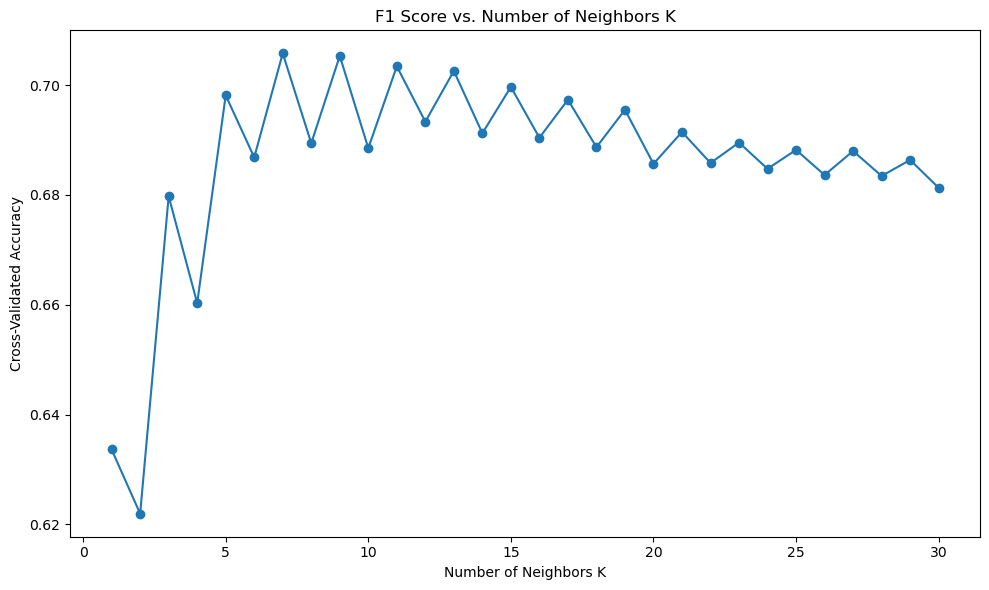

In [37]:
# Plotting the performance change with respect to K, using accuracy score

results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(param_grid["n_neighbors"], results["mean_test_score"], marker="o")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Cross-Validated Accuracy")
plt.title("F1 Score vs. Number of Neighbors K")
plt.tight_layout()
plt.show()

In [38]:
# Use the best model to make predictions on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_selected)

# Since the goal is to predict whether a loan is approved (a binary classification problem), it is appropriate to use average='binary' in the f1_score function. 
# This will focus on evaluating the performance related to predicting the positive class (loan approval).
accuracy_test = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred, average='binary')

print(f"The best value of K is: {best_k}")
print(f"Accuracy on testing data for best K: {accuracy_test}")
print(f"F1 Score on testing data for best K: {f1_test}")

The best value of K is: 7
Accuracy on testing data for best K: 0.8940652818991098
F1 Score on testing data for best K: 0.6956521739130435


**Key Insights**

The model with K = 7 achieves strong performance with:

* Accuracy: 0.8941, indicating that nearly 89.4% of predictions are correct.
* F1 Score: 0.6957, reflecting a good balance between precision and recall, particularly important when dealing with imbalanced classes.

This suggests that the model is highly accurate and reasonably effective at capturing both true positives and minimizing false positives/negatives. The selected K-value (7) seems to provide an optimal trade-off for this dataset.

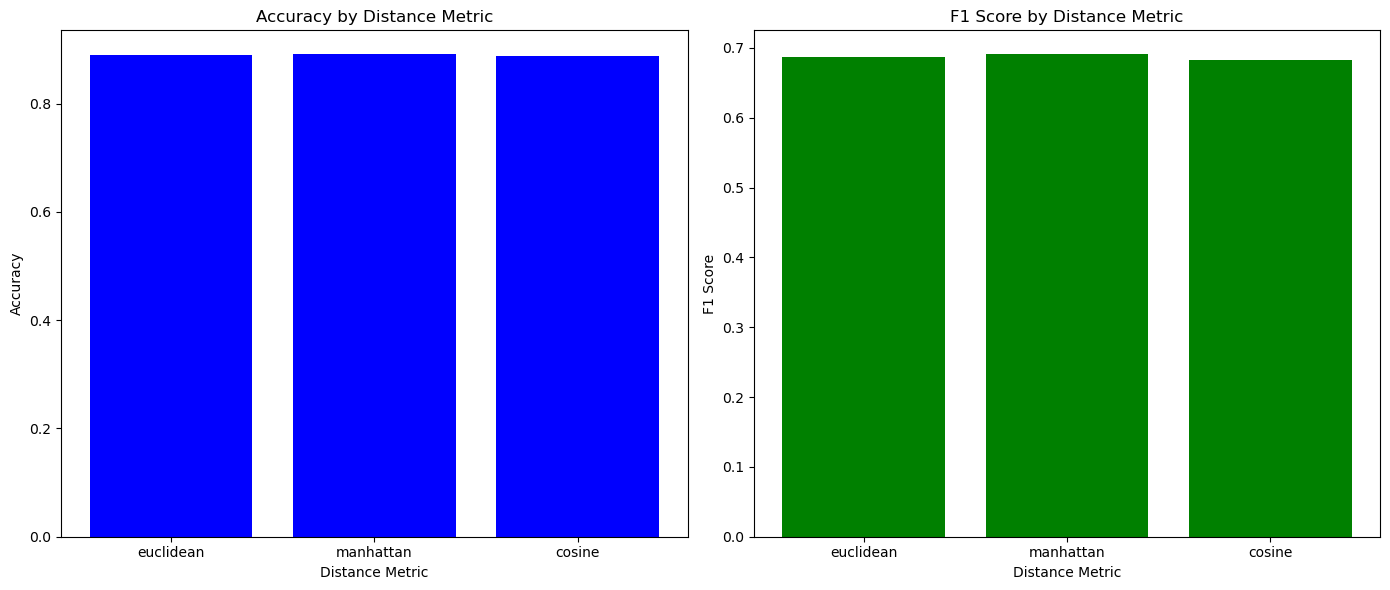

euclidean - Accuracy: 0.8894658753709199, F1 Score: 0.6873688627780109
manhattan - Accuracy: 0.8906528189910979, F1 Score: 0.6907259756609316
cosine - Accuracy: 0.8876854599406528, F1 Score: 0.6825995807127883


In [39]:
import matplotlib.pyplot as plt

# Create a dictionary to store results
metrics_results = {'Metric': [], 'Accuracy': [], 'F1 Score': []}

# Define the distance metrics to evaluate
distance_metrics = ['euclidean', 'manhattan', 'cosine']

for metric in distance_metrics:
    # Set up the KNN model with the specific metric
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    
    # Fit the model
    knn.fit(X_train_selected, y_train)
    
    # Make predictions on the test data
    y_test_pred = knn.predict(X_test_selected)
    
    # Calculate accuracy and F1-score
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Append the results to the corresponding keys (lists) in the dictionary
    metrics_results['Metric'].append(metric)
    metrics_results['Accuracy'].append(test_accuracy)
    metrics_results['F1 Score'].append(test_f1)

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy Bar Chart
plt.subplot(1, 2, 1)
plt.bar(metrics_results['Metric'], metrics_results['Accuracy'], color='blue')
plt.title('Accuracy by Distance Metric')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')

# F1 Score Bar Chart
plt.subplot(1, 2, 2)
plt.bar(metrics_results['Metric'], metrics_results['F1 Score'], color='green')
plt.title('F1 Score by Distance Metric')
plt.xlabel('Distance Metric')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

# Print the results for each metric
for i in range(len(metrics_results["Metric"])):
    metric = metrics_results["Metric"][i]
    accuracy = metrics_results["Accuracy"][i]
    f1_score = metrics_results["F1 Score"][i]

    print(f"{metric} - Accuracy: {accuracy}, F1 Score: {f1_score}")

**Reasons for the Small Difference**
* The dataset might have similar distributions across different features, meaning that the scaling or orientation of the data isn't drastically affected by the choice of distance metric. This could lead to similar results across different metrics.
* If the feature space is fairly uniform or well-behaved (without extreme outliers or high variability), different distance metrics may not dramatically impact the overall performance.
* The model itself could be fairly robust to small variations in distance calculations, meaning that minor differences in how distances are computed (Euclidean, Manhattan, or Cosine) don't significantly affect classification outcomes.
* In essence, while the choice of distance metric does influence performance, in this case, the dataset’s structure may not be sensitive enough to cause large performance discrepancies across different metrics.

## 3.3 Neural Network Model

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Initialise the MLP model with class_weight='balanced'
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluate performance using accuracy, F1, and ROC-AUC
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, mlp.predict_proba(X_test_scaled)[:, 1])

# Print the results
print(f"Accuracy: {accuracy_mlp}")
print(f"F1 Score: {f1_mlp}")
print(f"ROC AUC: {roc_auc_mlp}")

Accuracy: 0.9084569732937685
F1 Score: 0.7496957403651116
ROC AUC: 0.8919004683403127


**Model Performance Metrics**

* Accuracy of 0.9085 means that about 90.85% of loan approval predictions are correct. This is a strong result, indicating that the model is able to accurately classify loans into "approved" or "not approved" categories most of the time.
However, accuracy alone can be misleading, especially if the classes (approved vs. not approved) are imbalanced (e.g., far more approvals than rejections). That's why other metrics like F1 score and ROC AUC are important.

* F1 Score of 0.7497 indicates a good balance between precision (how many predicted loan approvals were actually approved) and recall (how many actual approvals were correctly identified).
In the context of loan approval, this score suggests that the model is fairly competent at managing both the false positives (predicting a loan approval when it’s actually rejected) and false negatives (predicting a rejection when the loan should be approved).
The F1 score being lower than accuracy implies that while the overall predictions are good, the model might struggle a bit more with one class (likely underpredicting approvals or overpredicting them).

* ROC AUC of 0.8919 is quite high, indicating that the model is very good at distinguishing between approved and not approved loans across different classification thresholds. A score close to 1.0 means the model performs well at ranking approvals and rejections, which is crucial in loan applications where the decision-making process often involves setting different thresholds for approval based on risk levels.

**Insights**
* The model shows excellent overall predictive ability (high accuracy and ROC AUC), meaning it is reliable in deciding whether to approve or reject a loan. This is critical for financial institutions where making the correct decision on high-risk loans can affect profitability and risk exposure.
* The F1 score indicates the model strikes a good balance between false approvals and false rejections. In a lending scenario, this is important because the F1 score of 0.7497 suggests the model handles this trade-off fairly well, though there may still be some room for improvement, especially if the business has a preference for minimizing one type of error over the other.
* With a high ROC AUC, the model is strong at identifying and separating high-quality loan applicants from riskier ones. This can help the institution confidently implement a more refined decision threshold. For example, if the institution wants to be more lenient (to increase loan volume) or more conservative (to reduce risk), the ROC AUC score provides a good foundation for adjusting that threshold without drastically impacting model performance.

In [41]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
print(conf_matrix)

[[5199  184]
 [ 433  924]]


**Key Insights:**
* The model is highly accurate at identifying loans that should not be approved (5199 TN), which indicates strong performance in managing risk and avoiding high-risk loans.
* The model has 433 false negatives, meaning some loan approvals are being missed. In practice, this means the model is somewhat conservative and might be rejecting loans that should have been approved.
* With only 184 false positives, the model makes relatively few incorrect approvals, helping mitigate financial risk by avoiding too many risky loan approvals.
* The 924 true positives show that the model is fairly good at identifying loans that should be approved, but there's room for improvement in reducing the false negatives.

The model demonstrates **solid performance in rejecting risky loans** (high true negatives) while being **cautious with approvals** (some false negatives), indicating that it is conservative in its approach. However, improvements can be made to capture more potential loan approvals without sacrificing risk management.

In [42]:
from sklearn.metrics import recall_score, precision_score, f1_score

# Define different thresholds for tuning
thresholds = [0.5, 0.4, 0.3, 0.2]

# Iterate over each threshold and compute the metrics
for threshold in thresholds:
    # Predict probabilities and apply threshold
    y_pred_threshold = (mlp.predict_proba(X_test_scaled)[:, 1] >= threshold).astype(int)
    
    # Calculate recall, precision, f1-score for the current threshold
    recall = recall_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    
    # Display results
    print(f"Threshold: {threshold}")
    print(f"Recall: {recall}, Precision: {precision}, F1-Score: {f1}\n")

Threshold: 0.5
Recall: 0.6809137803979366, Precision: 0.8339350180505415, F1-Score: 0.7496957403651116

Threshold: 0.4
Recall: 0.7008106116433309, Precision: 0.782716049382716, F1-Score: 0.73950233281493

Threshold: 0.3
Recall: 0.7273397199705232, Precision: 0.7004968062455642, F1-Score: 0.7136659436008677

Threshold: 0.2
Recall: 0.7575534266764923, Precision: 0.6011695906432749, F1-Score: 0.6703619171829149



1. Threshold: 0.5
* Recall: 0.681, Precision: 0.834, F1-Score: 0.750
* This is the default threshold, balancing both precision and recall. The model is more conservative, meaning it identifies more correct rejections (higher precision) but may miss some correct approvals (moderate recall).
2. Threshold: 0.4
* Recall: 0.701, Precision: 0.783, F1-Score: 0.740
* By lowering the threshold slightly, recall improves (more true approvals are captured), but precision drops a bit, indicating a small increase in false approvals. F1 score drops slightly, showing a slightly less balanced performance.
3. Threshold: 0.3
* Recall: 0.727, Precision: 0.700, F1-Score: 0.714
* At this lower threshold, recall improves even more (identifying more true approvals), but precision drops notably, meaning the model starts to approve more loans incorrectly. The F1 score reflects a trade-off here, as it starts to drop.
4. Threshold: 0.2
* Recall: 0.758, Precision: 0.601, F1-Score: 0.670
* At this threshold, the model is aggressive in predicting loan approvals (high recall) but sacrifices precision, with many false approvals. This could lead to higher risk for the lender. The F1 score decreases further, showing a growing imbalance.

**Key Insights**
* Higher Threshold (0.5): The model is conservative, with a strong focus on minimizing incorrect approvals (high precision) at the cost of missing some correct approvals (lower recall).
* Lower Threshold (0.2): The model becomes more aggressive in approving loans (higher recall), but the risk of approving bad loans increases (lower precision).

Ultimately, the choice of threshold should depend on the business's risk tolerance. If the institution prioritises avoiding risky loans, a higher threshold might be preferable. If it wants to capture more potential loan approvals, a lower threshold might be more suitable.

## End of Portfolio 4